In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images_aligned, train_labels_aligned, test_size=0.2, random_state=42)

# Creating ImageDataGenerator instances for training and validation sets
train_datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=0.5, rotation_range=30)
val_datagen = ImageDataGenerator()

# Preparing data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=64, seed=42, shuffle=True)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64, seed=42, shuffle=True)

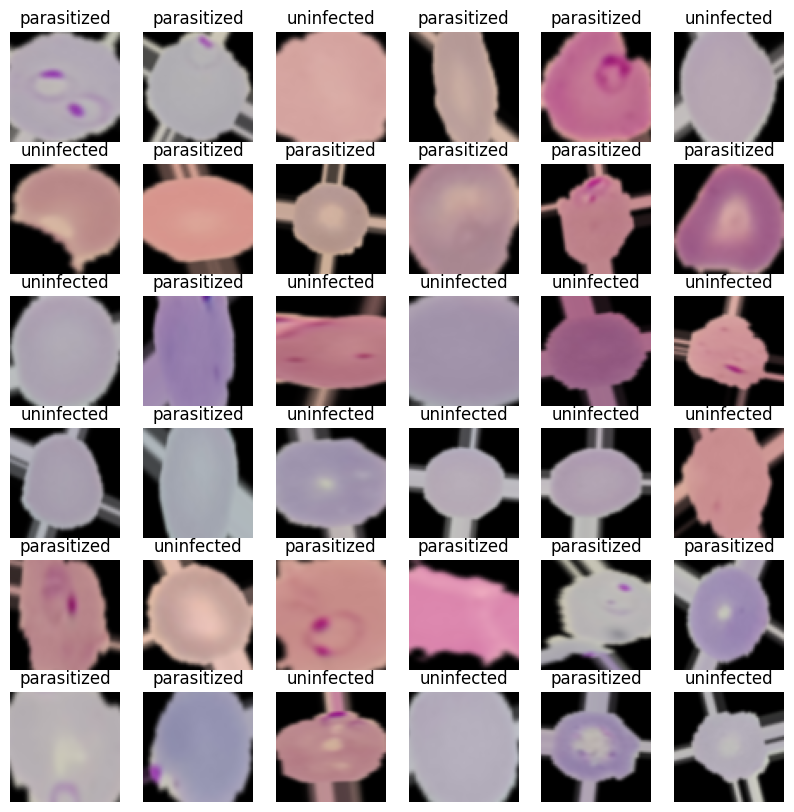

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(6, 6, figsize = (16, 8))

fig.set_size_inches(10, 10)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras import optimizers

# Create the model
model3 = Sequential()

# Add the model layers
model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64, 64, 3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=128, kernel_size=(3,3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output of the conv layers to feed into the dense layers
model3.add(Flatten())

# Add the dense layers
model3.add(Dense(units=128))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(Dense(units=2, activation='softmax'))  # 2 units for binary classification

# Use Adam optimizer
adam = optimizers.Adam(learning_rate=0.001)

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Print the summary of the model
model3.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 62, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 29, 29, 64)       

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit the model to the training data
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
624/624 [==============================] - 211s 334ms/step - loss: 0.7116 - accuracy: 0.4918 - val_loss: 0.6997 - val_accuracy: 0.4936
Epoch 2/10
624/624 [==============================] - 204s 327ms/step - loss: 0.6965 - accuracy: 0.5055 - val_loss: 0.6959 - val_accuracy: 0.4982
Epoch 3/10
624/624 [==============================] - 212s 340ms/step - loss: 0.6965 - accuracy: 0.5048 - val_loss: 0.6953 - val_accuracy: 0.4982
Epoch 4/10
624/624 [==============================] - 210s 337ms/step - loss: 0.6966 - accuracy: 0.5038 - val_loss: 0.7007 - val_accuracy: 0.5126
Epoch 5/10
624/624 [==============================] - 211s 339ms/step - loss: 0.6947 - accuracy: 0.5092 - val_loss: 0.6960 - val_accuracy: 0.5062
Epoch 6/10
624/624 [==============================] - 211s 338ms/step - loss: 0.6949 - accuracy: 0.5165 - val_loss: 0.7083 - val_accuracy: 0.5054
Epoch 7/10
624/624 [==============================] - 213s 341ms/step - loss: 0.6945 - accuracy: 0.5116 - val_loss: 0.7250 -

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels_one_hot, verbose=1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 8s 91ms/step - loss: 0.6961 - accuracy: 0.5177

 Test_Accuracy:- 0.5176923274993896


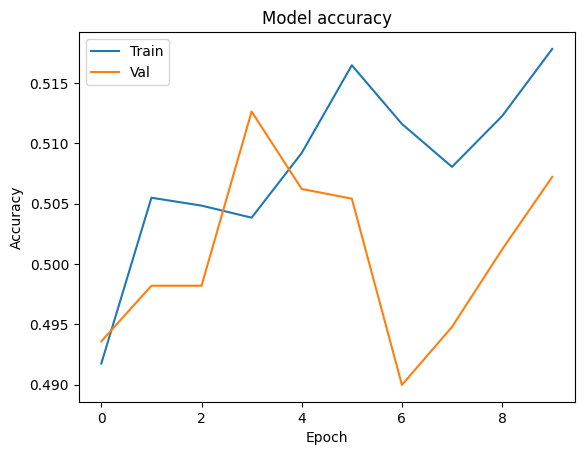

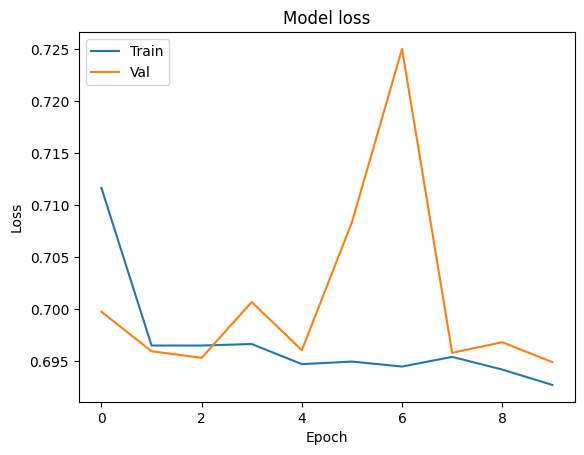

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()